<a href="https://colab.research.google.com/github/moosenichols/cs130-intro/blob/main/Numpy_arrays_in_image_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets
import random

data = datasets.fetch_olivetti_faces()

## Practicing Slicing of Matrices

# Image Compression

We have images (in grayscale) of size $64 \times 64$ pixels. These can be represented as an $64 \times 64$ matrix of numbers. The goal is to see if we can represent this matrix in a compressed way so that we don't need 64^2 numbers.

The parameter k will represent the rank of the compressed matrix.

Run the code blocks above and below to get started.

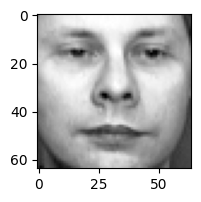

In [ ]:
images = data.images
image_num = 33  # can be anything from 0 to 399
plt.subplots(figsize=(2, 2)) # choose size of plot
plt.imshow(images[image_num,:,:], cmap=plt.cm.gray) # plot the image

(a) The code above should generate an image. (If it doesn't, scroll up to the top and make sure you've evaluated the import statements.) Change the image number to verify that you can generate different faces.

When satisfied, please run the code chunk below to prepare for the next section.

In [ ]:
%pip install -U ipytest  #this will take a minute to run
import ipytest
ipytest.autoconfig()



## Matrix Reconstruction

We are now going to represent each faces matrix in a compressed way, using a process called SVD. Any matrix M can be written as a product of three matrices:

$$ M = U S V^T,$$

where the matrix $S$ only has non-zero entries on the diagonal.
SVD (a function in the numpy library) calculates these three matrices (called U, S and V), as you can see in the function below. To restore the original matrix, they can just be multiplied together. However, our goal is not just to reconstruct the original matrix, but rather to compress it.

Your task is to slice off parts of these matrices to keep only the most important parts.  This produces smaller matrices, U', S' and V':

$$ M = U' S' V'^T. ~~~~(approximately)$$

This allows M to be represented in a compressed way, but you'll find that if you slice off too much of each matrix, the reconstructed image won't be a good match to the original.

(b) Fill in the blanks to achieve the following slicing:

In S, keep the top k rows and top k columns

In U, keep all the rows and only the top k columns

In V, keep all the columns and only the top k rows

In [ ]:
%%ipytest
# Returns the best rank-k approximation to M
def reconstruct(M, k):
    U, S_values, V = np.linalg.svd(M, full_matrices=False)
    S = np.diag(S_values)
    Sprime = S[0:k, 0:k]
    Uprime = U[:,0:k]
    Vprime = V[0:k, :]
    print(Uprime)
    return np.dot(np.dot(Uprime,Sprime),Vprime) #approximation of M

def test_slicing():
  m = np.matrix('1 2 3; 3 4 5; 6 7 8') # matrix for testing purposes
  m_reconstructed = reconstruct(m,1) # call the reconstruction function with k = 1
  m_correct_result = np.matrix('1.68331528 2.07660348 2.46989168; 3.26667312 4.02989556 4.79311799;5.64170987 6.95983366 8.27795746')
  assert np.allclose(m_reconstructed, m_correct_result)

You should see "1 passed in 0.04s" as the result of running the code above. If your slicing is incorrect, the pytest will tell you that the assertion failed, or you'll get some other error. When your function definition passes the test, continue.

The following test uses a larger matrix. With k = 6, the reconstruction should be so similar to the original matrix that it should pass this unit test. If it doesn't, please fix your code for "def reconstruct(M, k)."  

In [ ]:
%%ipytest
# Don't change anything in this code block until your function passes this test

def test_reconstruction():  # tests definition of reconstruct()
  random.seed(10)
  test_matrix = np.random.randn(9, 6)
  k = 6  #once it passes the test, you can change this value.

  # check that matrices are almost identical
  assert np.allclose(test_matrix, reconstruct(test_matrix,k))




(c) At this point, your code should have successfully passed these tests. Now reduce the value of k in the code chunk above. You should notice that if k is too small, the test will fail. This is expected behavior; it doesn't mean something needs to be fixed. It just means that you can only compress an image so far before it stops looking like the original image! What value of k do you find to be too small?

## Enter your failed value of k here: _________

Change the value of k back to k = 6 and run the code again before continuing on.

The following code picks an image in the dataset (I chose #33) and displays the following side-by-side as images: the original, and the rank-$k$ approximations for various values of k.
Try the code block below to make sure it works. Then try it for different images numbers (change image_num).

In [ ]:
image_num = 33 #TODO: you can change this
reconstructed_list = [images[image_num,:,:]]
k_list = [0]
for k in range(2,19,3): #TODO: you can change this range (in a new code chunk)
    M = images[image_num,:,:] #select the image
    A = reconstruct(M,k) #reconstruct the image
    reconstructed_list.append(A)
    k_list.append(k)
n_images = len(reconstructed_list) #includes the original as the first one
plt.figure(figsize=(12, 12))
for k in range(len(k_list)):
    ax = plt.subplot(1,n_images,k+1)
    plt.imshow(reconstructed_list[k], cmap=plt.cm.gray)
    if k>0: ax.set_title(f"k={k_list[k]}")
    if k==0: ax.set_title("Original")

Notice that this appears in the code:
range(2,19,3)

This means, "start with k = 2, go up in steps of 3 and stop before you hit 19."  Copy-paste the entire code block into a new code chunk below so we can try a different range but retain the images you've already generated. Change the range so that the images printed are:

original, k = 1, k= 3, k = 5, k = 7, and k = 9.

In [ ]:
#paste your code here